In [1]:
import cv2
import numpy as np
import skimage
import matplotlib.pyplot as plt
import os

(-0.5, 799.5, 799.5, -0.5)

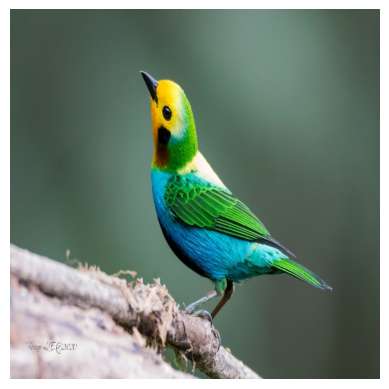

In [2]:
# read the image
img= cv2.imread(r"C:\Users\varsha\Pictures\CV_IMG\1200.jpg")

# resize the img
img= cv2.resize(img, (800,800))

# convert to rgb
rgb_img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.axis('off')

Text(0.5, 1.0, 'Gray Img')

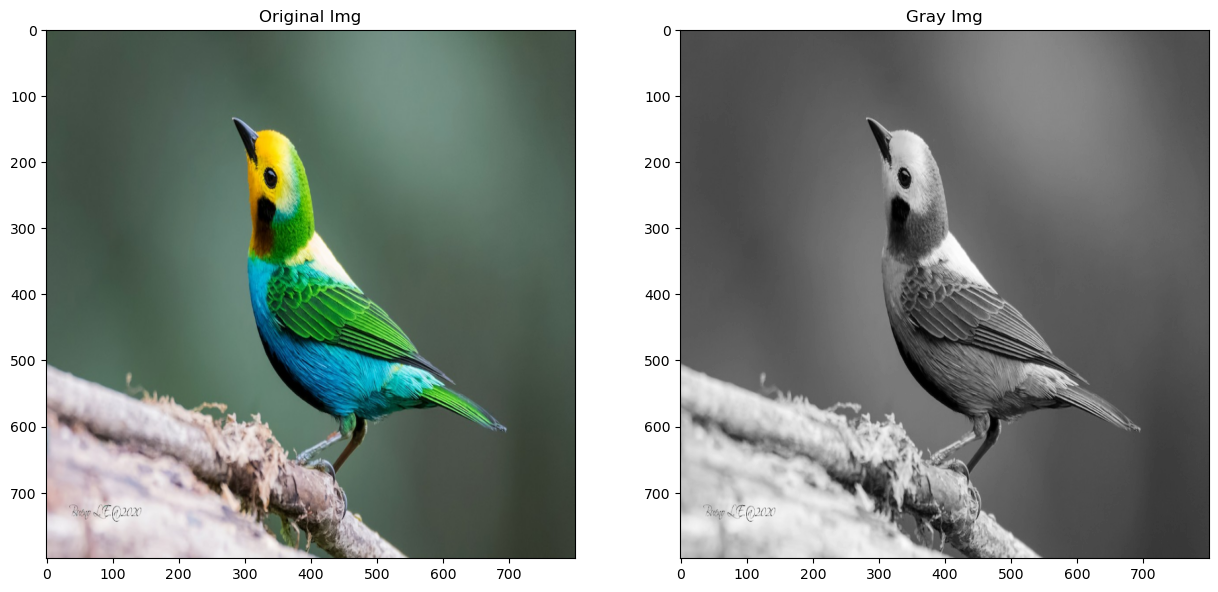

In [3]:
# convert rgb to gray scale
gray_img= cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

# Plot the images
fig, ax= plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(rgb_img)
ax[0].set_title('Original Img')

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Gray Img')

Text(0.5, 1.0, 'Blurred Img')

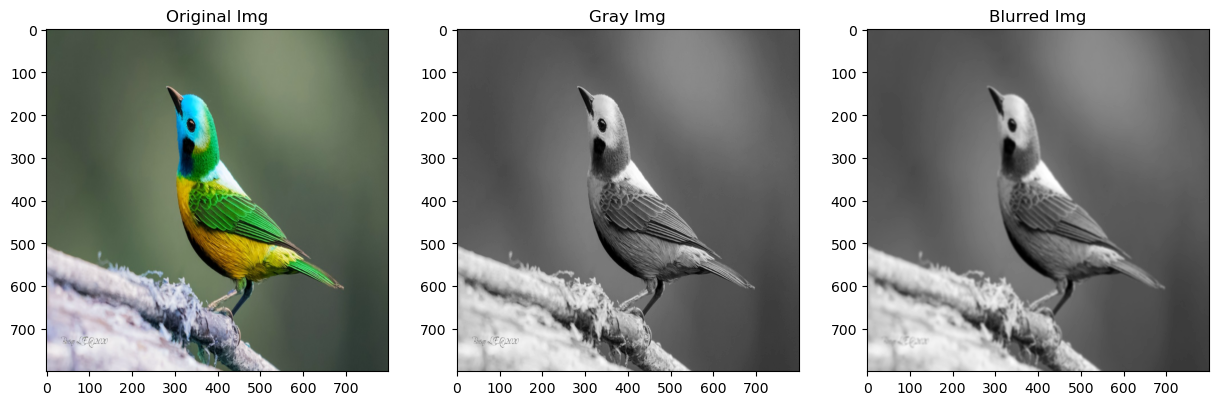

In [4]:
# Denoise the img by blurring
blur_img= cv2.GaussianBlur(gray_img, (7,7), 2)

# Plot the images

fig, ax= plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(img)
ax[0].set_title('Original Img')

ax[1].imshow(gray_img, cmap='gray')
ax[1].set_title('Gray Img')

ax[2].imshow(blur_img, cmap='gray')
ax[2].set_title('Blurred Img')

In [19]:
gray_img

array([[ 74,  74,  75, ...,  79,  79,  78],
       [ 75,  75,  75, ...,  79,  78,  77],
       [ 76,  76,  75, ...,  79,  78,  77],
       ...,
       [194, 192, 191, ...,  60,  59,  59],
       [194, 192, 191, ...,  61,  59,  59],
       [194, 192, 190, ...,  61,  58,  60]], dtype=uint8)

In [35]:
blur_img[:,100]

array([ 78,  78,  78,  78,  78,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  78,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  76,  76,  76,  76,  76,  76,  76,  76,
        76,  76,  76,  76,  76,  76,  76,  76,  76,  76,  76,  76,  76,
        76,  76,  76,  76,  76,  76,  76,  76,  76,  76,  77,  77,  77,
        76,  76,  76,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  76,  76,  76,  76,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  76,  76,  76,  76,  76,  7

#### Thresholding
Thresholding transforms images into binary images. We need to set the threshold value and max values and then we convert the pixel values accordingly!

In [31]:
from skimage.filters import threshold_otsu

# Find Otsu Threshold : One way to calculate threshold
thresh= threshold_otsu(blur_img)

# Another way to calc threshold
_, th2= cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(_, thresh, th2[:,100])

#create the binary image
binary_img= blur_img < th2

146.0 146 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 

In [36]:
binary_img[:,100]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [38]:
#create a mask for the binary_img where holes are white (1) and the rest is black (0)

binary= np.zeros(shape= binary_img.shape)
black_img= np.zeros(shape= binary_img.shape)

binary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

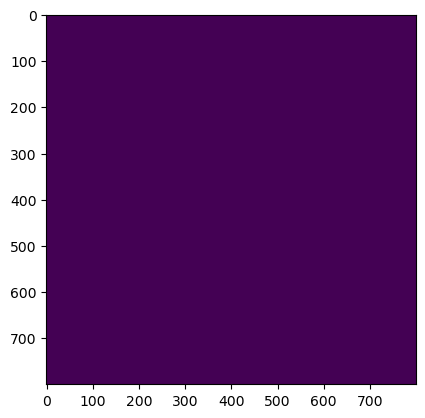

In [8]:
plt.imshow(binary)

In [9]:
binary.shape

(800, 800)

In [10]:
binary[binary_img] = 1
binary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

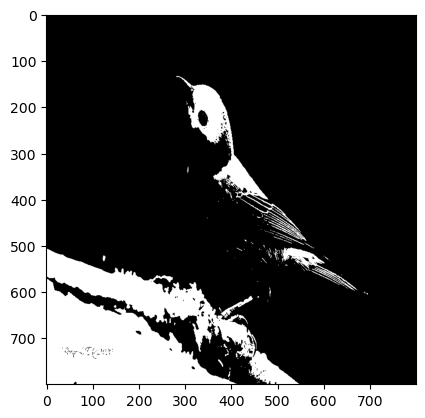

In [11]:
plt.imshow(binary, cmap= 'gray')

In [12]:
from skimage.measure import find_contours

# find contours of the holes
contours= find_contours(binary, level= 0.9)

# contours, hi= cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

print('{} holes were detected in this image of bird.'.format(len(contours)))

453 holes were detected in this image of bird.


In [40]:
contours[0]

array([[470.1, 549. ],
       [470. , 548.9],
       [469.1, 548. ],
       ...,
       [469. , 549.1],
       [470. , 549.1],
       [470.1, 549. ]])

(-0.5, 799.5, 799.5, -0.5)

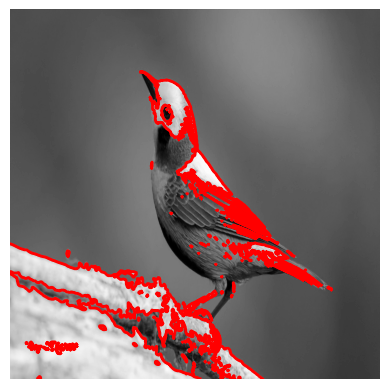

In [14]:
# Plot the contour for each of the holes

for contour in contours:
    plt.plot(contour[:,1], contour[:,0], linewidth= 2, color= 'red')
    
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

(-0.5, 799.5, 799.5, -0.5)

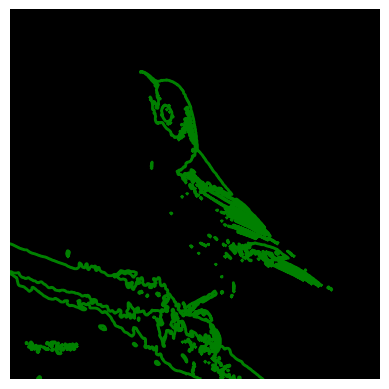

In [15]:
for contour in contours:
    plt.plot(contour[:,1], contour[:,0], linewidth= 2, color= 'green')
    
plt.imshow(black_img, cmap='gray')
plt.axis('off')

In [16]:
# Double check the answer using label()

In [17]:
from skimage.measure import label

labs, count= label(binary, return_num= True)
print('{} holes were found in the bird image.'.format(count))

158 holes were found in the bird image.
